In [90]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [91]:
def get_distances(X,model,mode='precomputed'):
    distances = []
    weights = []
    children=model.children_
    dims = (X.shape[1],1)
    distCache = {}
    weightCache = {}
    for childs in children:
        c1 = X[childs[0]].reshape(dims)
        c2 = X[childs[1]].reshape(dims)
        c1Dist = 0
        c1W = 1
        c2Dist = 0
        c2W = 1
        if childs[0] in distCache.keys():
            c1Dist = distCache[childs[0]]
            c1W = weightCache[childs[0]]
        if childs[1] in distCache.keys():
            c2Dist = distCache[childs[1]]
            c2W = weightCache[childs[1]]
        d = np.linalg.norm(c1-c2)
        cc = ((c1W*c1)+(c2W*c2))/(c1W+c2W)

        X = np.vstack((X,cc.T))

        newChild_id = X.shape[0]-1

        # How to deal with a higher level cluster merge with lower distance:
        if mode=='precomputed':  # Increase the higher level cluster size suing an l2 norm
            added_dist = (c1Dist**2+c2Dist**2)**0.5 
            dNew = (d**2 + added_dist**2)**0.5
        elif mode == 'max':  # If the previrous clusters had higher distance, use that one
            dNew = max(d,c1Dist,c2Dist)
        elif mode == 'actual':  # Plot the actual distance.
            dNew = d


        wNew = (c1W + c2W)
        distCache[newChild_id] = dNew
        weightCache[newChild_id] = wNew

        distances.append(dNew)
        weights.append( wNew)
    return distances, weights

In [92]:
# Make 4 distributions, two of which form a bigger cluster
X1_1 = np.random.randn(25,2)+[8,1.5]
X1_2 = np.random.randn(25,2)+[8,-1.5]
X2_1 = np.random.randn(25,2)-[8,3]
X2_2 = np.random.randn(25,2)-[8,-3]

In [93]:
# Merge the four distributions
X = np.vstack([X1_1,X1_2,X2_1,X2_2])

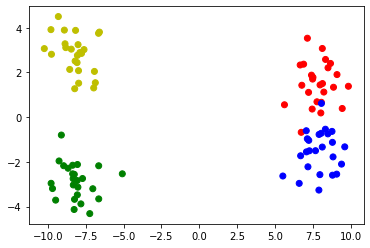

In [94]:
# Plot the clusters
colors = ['r']*25 + ['b']*25 + ['g']*25 + ['y']*25
plt.scatter(X[:,0],X[:,1],c=colors)

In [95]:
model = AgglomerativeClustering(n_clusters=2,linkage="single")
model.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [96]:
distance, weight = get_distances(X,model)

In [97]:
linkage_matrix = np.column_stack([model.children_, distance, weight]).astype(float)

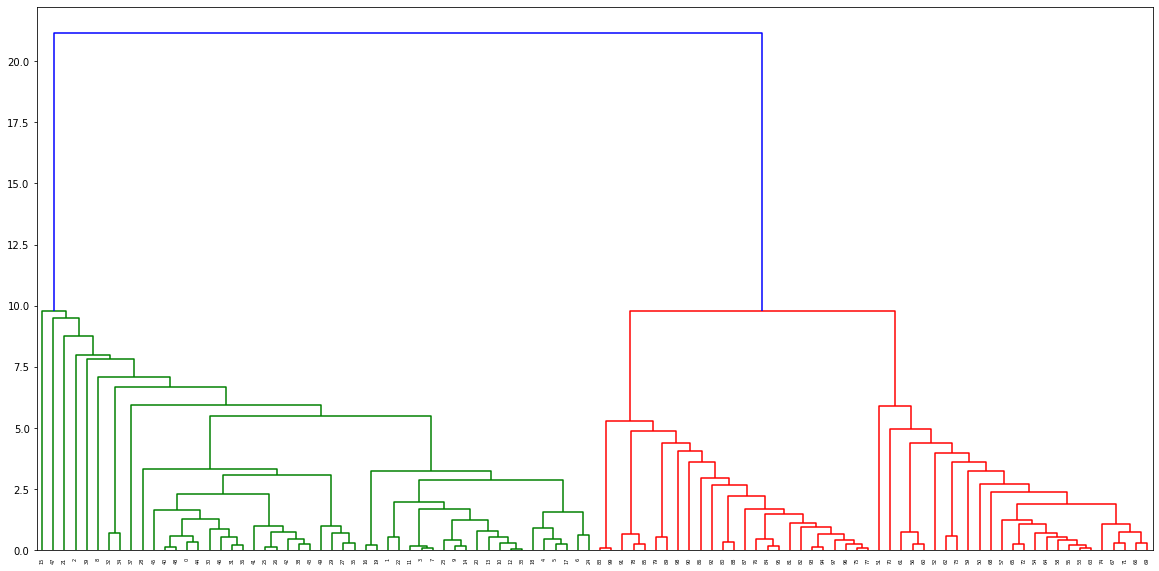

In [98]:
plt.figure(figsize=(20,10))
dendrogram(linkage_matrix)
plt.show()